In [1]:
from csv import DictReader
from datetime import datetime
import numpy as np
import itertools
import matplotlib as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import operator

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Število iger po žanrih

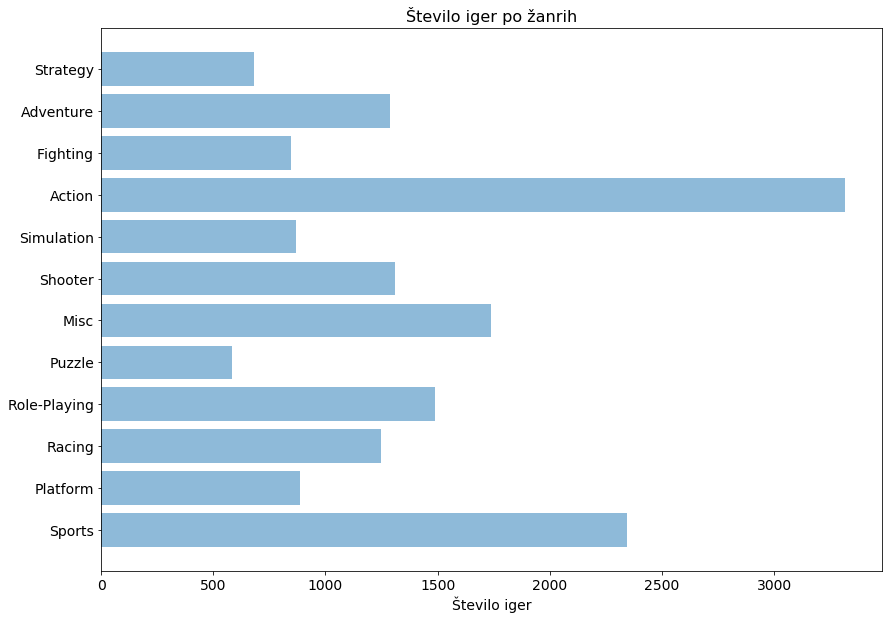

In [2]:
videogames_data = {}
genre = dict()


with open('../../podatki/vgsales.csv', 'rt', encoding='utf-8') as data:
    for row in DictReader(data):
        videogames_data[row['Rank']] = row
                        

# Primer branja iz slovarja podatkov
for key, value in videogames_data.items():
    for atribut, vrednost in value.items():
        if atribut == "Genre":
            if vrednost in genre:
                genre[vrednost] += 1
            else:
                genre[vrednost] = 1
                

names = list()
values = list()
for item in genre:
    names.append(item)
    values.append(genre[item])
y_pos = np.arange(len(names))

fig = plt.figure(figsize=(14, 10))
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, names, fontsize=14)
plt.xlabel("Število iger", fontsize=14)
plt.xticks(fontsize=14)
plt.title('Število iger po žanrih', fontsize=16);

plt.show()

fig.savefig('../../slike/stevilo_iger_po_žanrih.png')

### Število iger proizvedenih na leto

Leto | Število proizvedenih iger
1980 | 9 || 1981 | 46 || 1982 | 36 || 1983 | 17 || 1984 | 14 || 1985 | 14 || 1986 | 21 || 
1988 | 15 || 1989 | 17 || 1990 | 16 || 1991 | 41 || 1992 | 43 || 1993 | 60 || 1994 | 121 || 
1996 | 263 || 1997 | 289 || 1998 | 379 || 1999 | 338 || 2000 | 349 || 2001 | 482 || 2002 | 829 || 
2004 | 763 || 2005 | 941 || 2006 | 1008 || 2007 | 1202 || 2008 | 1428 || 2009 | 1431 || 2010 | 1259 || 
2012 | 657 || 2013 | 546 || 2014 | 582 || 2015 | 614 || 2016 | 344 || 2017 | 3 || 2020 | 1 || 


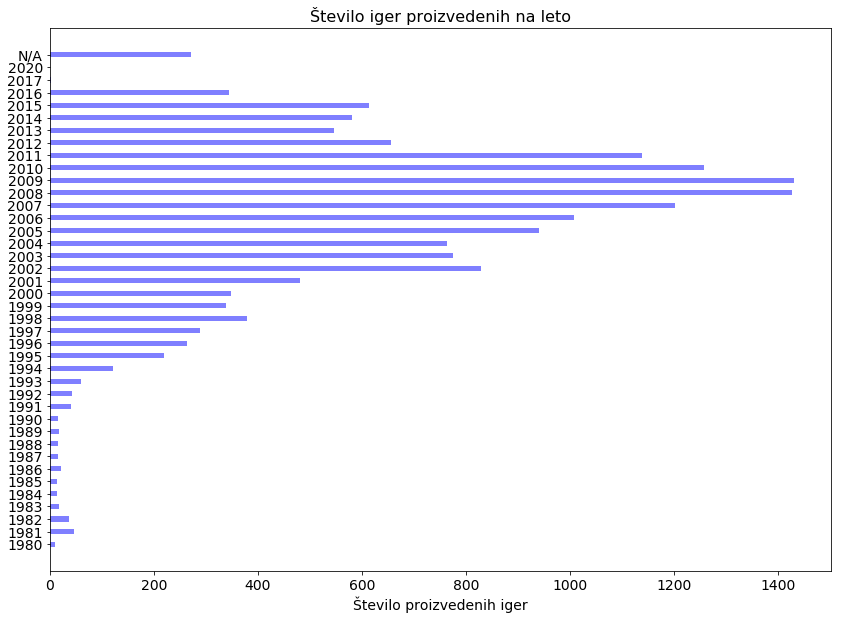

In [3]:
genre = dict()
for key, value in videogames_data.items():
    for atribut, vrednost in value.items():
        if atribut == "Year":
            if vrednost in genre:
                genre[vrednost] += 1
            else:
                genre[vrednost] = 1

names = list()
values = list()
i = 0

print("Leto | Število proizvedenih iger")
for item in sorted(genre):
    if(i == 8):
        i = 0
    i += 1
    if(i != 8):
        print(str(item), "|", str(genre[item]),end=" || ")
    else:
        print()
    names.append(item)
    values.append(genre[item])
y_pos = np.arange(len(names)) * 2

fig = plt.figure(figsize=(14, 10))
plt.barh(y_pos, values, align='center', alpha=0.5, color='blue')
plt.yticks(y_pos, names, fontsize=14)
plt.xlabel("Število proizvedenih iger", fontsize=14)
plt.xticks(fontsize=14)
plt.title('Število iger proizvedenih na leto', fontsize=16);
plt.show()

fig.savefig('../../slike/stevilo_iger_proizvedenih_na_leto.png')

In [4]:
platgen = dict()
plattit = dict()
nam = list()
for key, value in videogames_data.items():
    for atribut, vrednost in value.items():
        if atribut == "Genre":
            gen = vrednost
        if atribut == "Platform":
            plat = vrednost
    if plat in plattit:
        plattit[plat] +=1
    else:
        plattit[plat] =1
    ou = (plat,gen)
    if ou in platgen:
        platgen[ou] += 1
    else:
        platgen[ou] = 1



for plat,gen in sorted(platgen):
    if plattit[plat] > 1250:
        if plat not in nam:
            nam.append(plat)
            

i = 0
trace = list()
for n in nam:
    names = list()
    values = list()
    for plat,gen in sorted(platgen):
        if plat == n:
            ou = (plat,gen)
            names.append(gen)
            values.append(platgen.get(ou))
    trace.append(go.Bar(x=names,y=values,name=n))       

layout = {'title': 'Število iger glede na žanro za igre z več kot 1250 iger'}
fig = go.Figure(data=trace, layout=layout)
iplot(fig, show_link=False)


In [5]:
igre_s = dict()
igre = dict()
#Če je povprečje števila prodanih iger večje to pomeni da je so igre, z več platformami tudi bolj prodajane
for key, value in videogames_data.items():
    for atribut, vrednost in value.items():
        if atribut == "Name":
            name = vrednost
        if atribut == "Global_Sales":
            sales = vrednost
    if name in igre_s:
        igre_s[name] += float(sales)
    else:
        igre_s[name] = float(sales)
    if name in igre:
        igre[name] += 1
    else:
        igre[name] = 1
c = 0
c2 = 0
sum_m = 0
sum_o = 0
for i in sorted(igre):
    if igre.get(i) > 1:
        sum_m +=igre_s.get(i)
        c +=1
    else:
        sum_o +=igre_s.get(i)
        c2 +=1
        
avg_m = sum_m/c
avg_o = sum_o/c2

print("Prodaja iger z več izdajami: ",avg_m," Prodaja iger z eno izdajo: ",avg_o)

Prodaja iger z več izdajami:  1.6884036036035999  Prodaja iger z eno izdajo:  0.48579031888048707


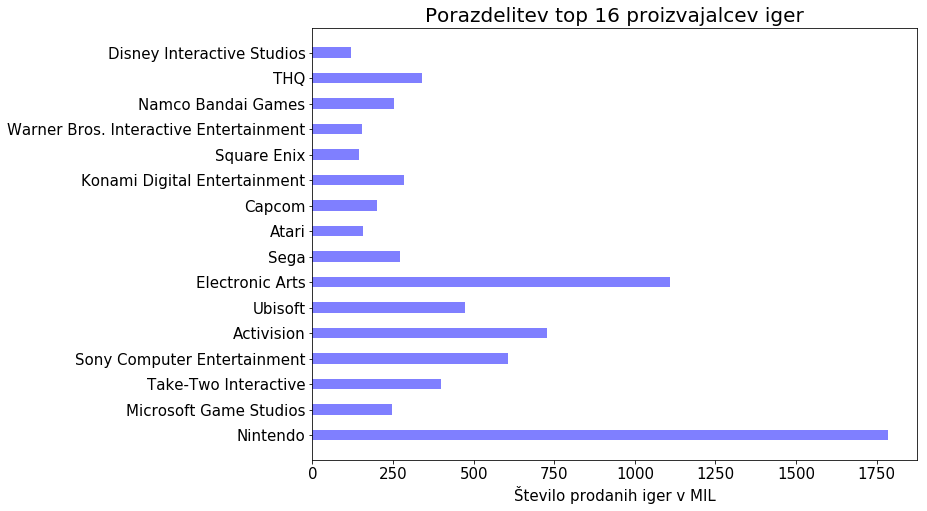

In [6]:
ig = dict()
for key, value in videogames_data.items():
    for atribut, vrednost in value.items():
        if atribut == "Publisher":
            name = vrednost
        if atribut == "Global_Sales":
            sales = vrednost
    if name in ig:
        ig[name] += float(sales)
    else:
        ig[name] = float(sales)
        
names = list()
values = list()
for name,val in ig.items():
    if val > 100:
        names.append(name)
        values.append(val)
fig = plt.figure(figsize=(14, 10))
y_pos = np.arange(len(names)) * 2
plt.axes([0.35,0.2, 0.60, 0.60])
plt.barh(y_pos, values, align='center', alpha=0.5, color='blue')
plt.yticks(y_pos, names, fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Število prodanih iger v MIL", fontsize=15)
plt.title("Porazdelitev top 16 proizvajalcev iger", fontsize=20)
plt.show()
fig.savefig('../../slike/stevilo_iger_prodanih_od_proizvajalcev_16.png')